In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import seaborn as sb

In [7]:
df=pd.read_csv("/content/spam.csv",encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
x=df.v2
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [11]:
y=df.v1
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [12]:
y.replace(to_replace='ham',value=1,inplace=True)
y.replace(to_replace='spam',value=0,inplace=True)
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64

In [13]:
y=df.v1
y.value_counts()

1    4825
0     747
Name: v1, dtype: int64

<Axes: xlabel='v1', ylabel='Count'>

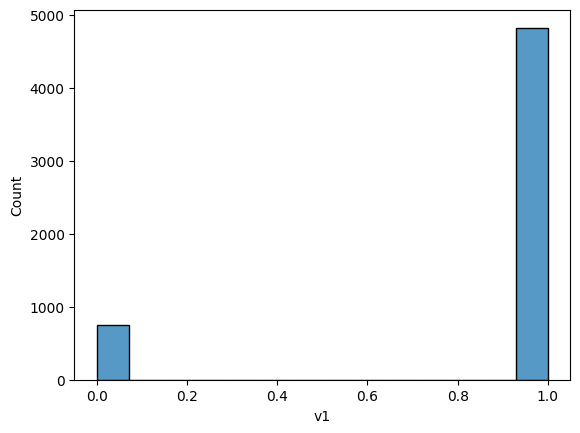

In [14]:
sb.histplot(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=25)

In [16]:
gok= pd.concat([x_train, y_train], axis=1)
spam = gok[gok.v1==0]
ham = gok[gok.v1==1]

In [17]:
assem=resample(spam,replace=True,n_samples=len(ham),random_state=25)

In [18]:
upsample=pd.concat([ham,assem])
upsample.v1.value_counts()

1    4350
0    4350
Name: v1, dtype: int64

In [19]:
y_train=upsample.v1
x_train=upsample.v2

In [20]:
x_train

778     Happy New year my dear brother. I really do mi...
5444    Good morning. At the repair shop--the ONLY rea...
4114    Sorry. You never hear unless you book it. One ...
3229    I feel like a dick because I keep sleeping thr...
3180    So many people seems to be special at first si...
                              ...                        
3569    Customer Loyalty Offer:The NEW Nokia6650 Mobil...
3817    74355 XMAS iscoming & ur awarded either å£500 ...
4504    Mobile Club: Choose any of the top quality ite...
269     Ringtone Club: Get the UK singles chart on you...
1141    I don't know u and u don't know me. Send CHAT ...
Name: v2, Length: 8700, dtype: object

In [21]:
y_train

778     1
5444    1
4114    1
3229    1
3180    1
       ..
3569    0
3817    0
4504    0
269     0
1141    0
Name: v1, Length: 8700, dtype: int64

<Axes: xlabel='v1', ylabel='Count'>

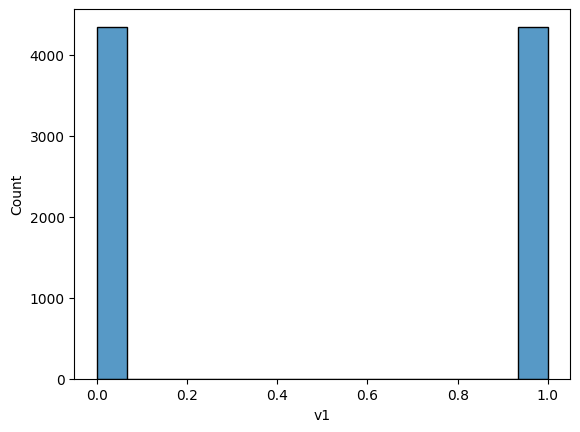

In [22]:
sb.histplot(y_train)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
tf=vect.fit_transform(x_train)
tt=vect.transform(x_test)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [24]:
mail=[
    'Enjpy your biryani by ordering it now',
    'claim free offer,shop now',
    'your file was found',
    'enjoy zomato for free',
]

mail=vect.transform(mail)
print(mail)

  (1, 6289)	0.6646583765359628
  (1, 5037)	0.5403845880532138
  (1, 3101)	0.3343090666643328
  (1, 1886)	0.39300278299416563
  (2, 2959)	1.0
  (3, 3101)	0.4969001371840875
  (3, 2711)	0.8678077285127362


In [25]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()

mod.fit(tf,y_train)

LogisticRegression()

In [26]:
mod.predict(tt)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [27]:
mod.score(tt,y_test)

0.9874551971326165

In [30]:
mod.predict(mail)

array([1, 0, 1, 0])